# Rascunho Notebook 2

### Andressa Wille
#### Notebook 2: object selection
Plots:  Distribuições de magnitudes;
Distribuições de magnitude errors;
Distribuições de cores;
Distribuições de photo-z;
Distribuições de photo-z error;
Number counts normalizados com referências da literatura (vide product log);
Plot magnitude X error;
Plot magnitude X redshift;
Color-magnitude diagrams;
Color-color diagrams.


Dados: VAC 6850

In [56]:
import numpy as np 
import matplotlib.pyplot as plt
import pylab as pl
from astropy.table import Table
import sys
from funcs import * 

In [57]:
vac = get_vac(pid='6850',
            vac_schema='cluster', 
            bands=['g', 'r', 'i', 'z', 'y'],
            sample_frac = 0.1)

In [58]:
vac.describe()

,ra,dec,hpix_4096,z_best,err_z,mag_g,magerr_g,mag_r,magerr_r,mag_i,magerr_i,mag_z,magerr_z,mag_y,magerr_y
count,232943.000000,232943.000000,2.329430e+05,232943.000000,232943.000000,232943.000000,232943.000000,232943.000000,232943.000000,232943.000000,232943.000000,232943.000000,232943.000000,232943.000000,2.329430e+05
mean,35.427314,-5.263956,8.093065e+07,0.782519,0.330547,24.087435,0.207370,23.384932,0.127874,22.907058,0.130025,22.654322,0.191277,23.299401,-1.060087e+01
std,1.958754,1.376309,2.431357e+07,0.293153,0.617746,1.230491,0.784183,1.223252,0.209332,1.201640,0.187175,1.282904,0.240931,3.560413,5.555936e+03
min,30.955401,-8.374435,7.236813e+07,0.000184,0.000458,11.605763,0.000084,11.378905,0.000171,11.216693,0.000251,10.965320,0.000279,10.301654,-2.675988e+06
25%,33.824014,-6.378750,7.242248e+07,0.558081,0.165064,23.530236,0.074276,22.848747,0.053649,22.342948,0.054908,22.003451,0.071964,21.861117,1.484233e-01
50%,35.450146,-5.142206,7.246051e+07,0.785477,0.290894,24.202723,0.131855,23.669461,0.104854,23.241209,0.112995,22.918324,0.151092,22.743901,3.381366e-01
75%,37.092673,-4.175005,7.251330e+07,0.999528,0.413452,24.781764,0.214847,24.197730,0.164226,23.804664,0.176323,23.543142,0.252965,23.527574,6.327298e-01
max,39.369491,-2.391420,1.507164e+08,1.998370,149.203430,29.993302,297.506859,27.796481,41.568326,24.249994,42.916352,26.193530,39.410173,37.500000,1.507686e+05


In [59]:
bands = ['g', 'r', 'i', 'z', 'y']
colors = ['g-r', 'r-i', 'i-z', 'z-y']

### Distribuição de magnitudes

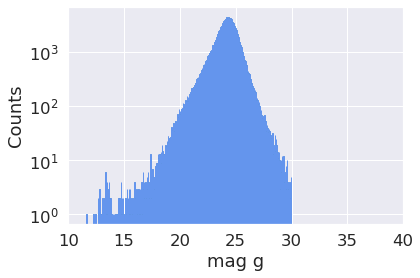

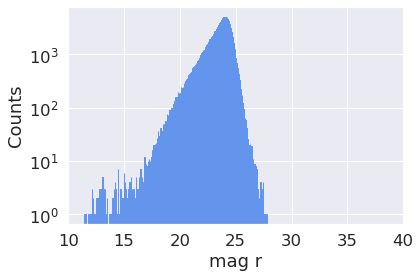

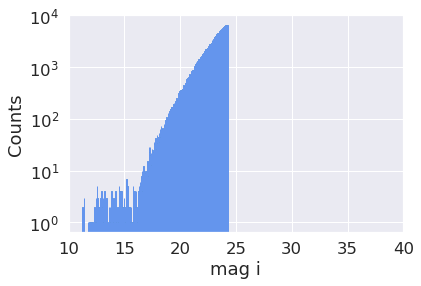

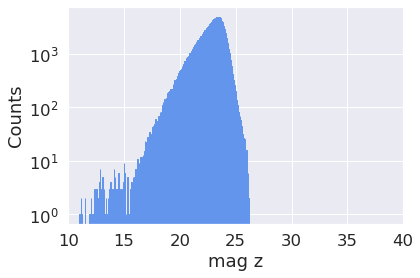

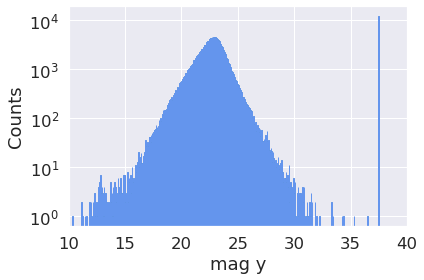

In [81]:
for i, band in enumerate(bands):
    plt.figure()
    plt.hist(vac[f'mag_{band}'], histtype='bar', bins='auto', ec="cornflowerblue")
    plt.xlabel("mag "+band)
    plt.ylabel("Counts")
    plt.xlim(10, 40)
    plt.yscale('log')
plt.tight_layout()

### Distribuição de erros nas magnitudes

In [ ]:
for i, band in enumerate(bands):
    plt.figure(figsize=[10,5])
    plt.hist(vac[f'magerr_{band}'], bins='auto', ec="cornflowerblue")
    plt.xlabel("mag err "+band)
    plt.ylabel("Counts")
    plt.xlim(10, 40)
    plt.yscale('log')
    plt.grid(True)
pl.tight_layout()

### Distribuição de cores

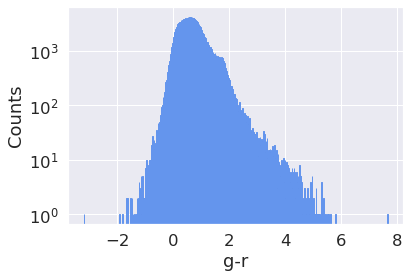

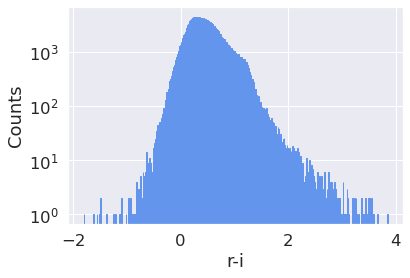

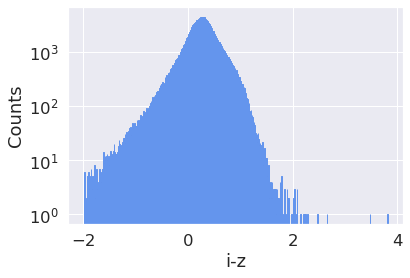

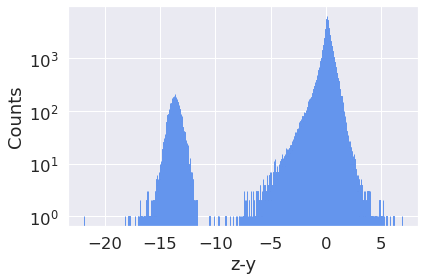

In [83]:
for i, band in enumerate(colors):
    plt.figure() 
    vac[colors[i]] = vac[f'mag_{bands[i]}'] - vac[f'mag_{bands[i+1]}']
    plt.hist(vac[colors[i]], bins='auto', ec="cornflowerblue")
    plt.xlabel(band)
    plt.ylabel("Counts")
    plt.yscale('log')
    #plt.grid(True)
plt.tight_layout()

### Distribuição de photo z

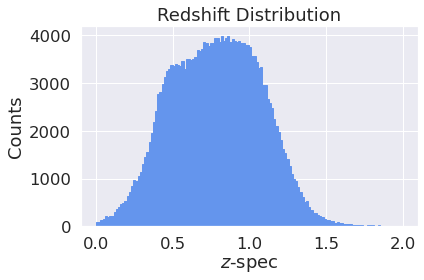

In [85]:
plt.hist(vac['z_best'], bins='auto', ec="cornflowerblue", fc="cornflowerblue")
plt.xlabel("$z$-spec")
plt.ylabel("Counts")
plt.title("Redshift Distribution")
plt.tight_layout()

### Distribuição de erro no photo z

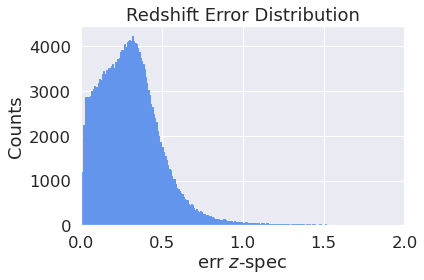

In [86]:
plt.hist(vac['err_z'], bins='auto', ec="cornflowerblue", fc="cornflowerblue")
plt.xlabel("err $z$-spec")
plt.ylabel("Counts")
plt.xlim(0, 2)
plt.title("Redshift Error Distribution")
plt.tight_layout()

### Plot magnitudes x erro 

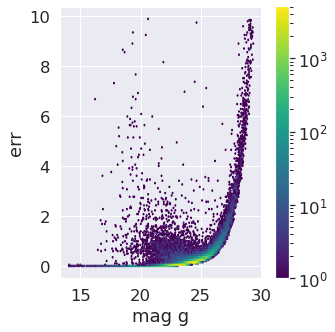

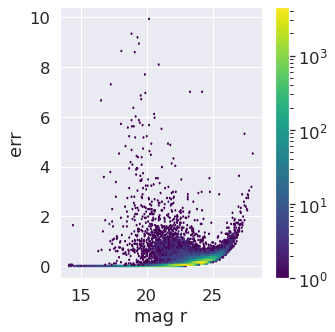

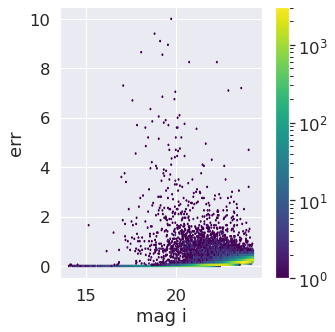

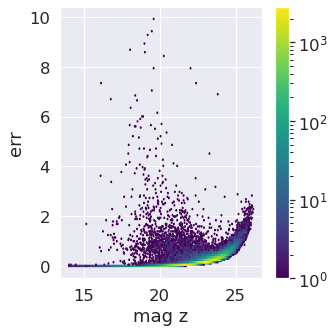

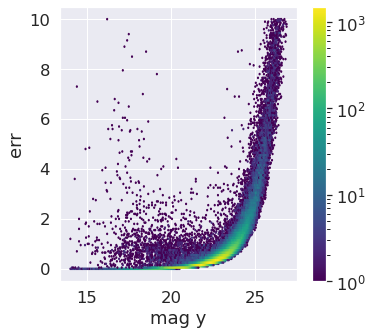

In [17]:
for i, band in enumerate(bands):
    pl.figure(figsize=[10,5])
    pl.subplot(121) 
    mag = np.array(vac[f'mag_{band}'])
    err = np.array(vac[f'magerr_{band}'])
    mask = (mag>14)&(mag<32)&(err<10)
    #MASCARA?
    pl.hexbin(mag[mask], err[mask],None,  mincnt=1, cmap='viridis', gridsize=[200,100], bins='log')
    cbar = pl.colorbar()
    pl.xlabel("mag "+band)
    pl.ylabel("err")
    pl.grid(True)
pl.tight_layout()

### Plot magnitudes x redshift

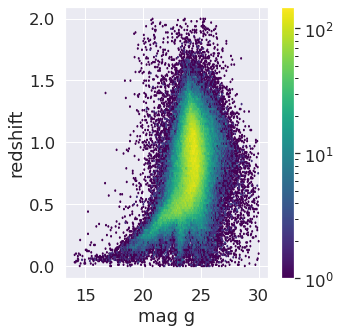

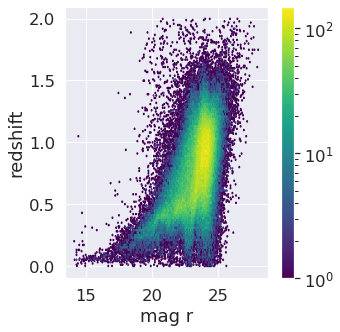

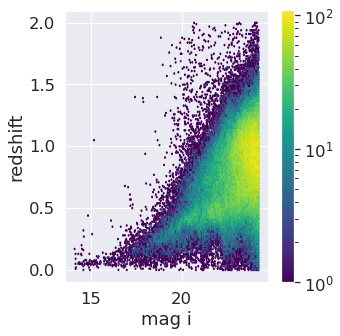

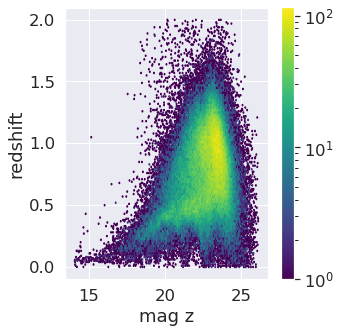

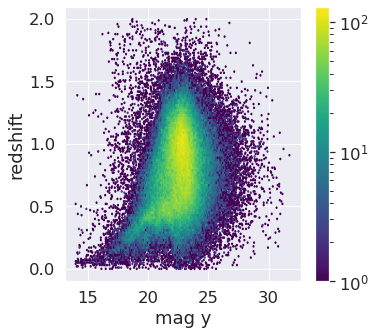

In [22]:
for i, band in enumerate(bands):
    pl.figure(figsize=[10,5])
    pl.subplot(121) 
    mag = np.array(vac[f'mag_{band}'])
    z = np.array(vac['z_best'])
    mask = (mag>14)&(mag<32)&(z<=2)
    pl.hexbin(mag[mask], z[mask], None,  mincnt=1, cmap='viridis', gridsize=[200,100], bins='log')
    cbar = pl.colorbar()
    pl.xlabel("mag "+band)
    pl.ylabel("redshift")
    pl.grid(True)
pl.tight_layout()

### CMD

In [87]:
vacs = [vac]
titles = ["VAC 6850"]

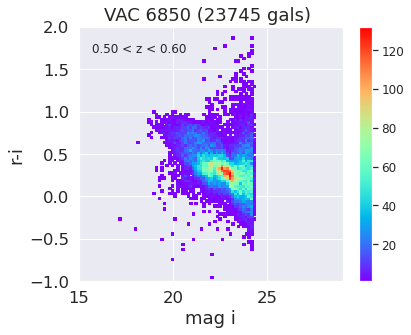

In [102]:
x, y = 'mag_i', 'r-i'
z_low, z_up = 0.5, 0.6
color_cut = 0.65
x_range, y_range = [15,29], [-1., 2]


plot_loop(vacs, x, y, z_low, z_up, color_cut, x_range, y_range, titles)

### CCD